#### Plotting multiple graphs

The subplot() command:

- Syntax: subplot(nrows, ncols, nsubplot)
- Subplot ordering:
	- Row-wise from top left
	- Indexed from 1

plt.axis('equal')

plt.style.available

#### Working with 2D arrays

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u = np.linspace(-2, 2, 25)
v = np.linspace(-1, 1, 25)

X, Y = np.meshgrid(u, v)

Z = X**2/25 + Y**2/4

print('Z:\n')
plt.set_cmap('gray')

plt.pcolor(X,Y,Z)
plt.colorbar()

plt.show()

Z:



<Figure size 640x480 with 2 Axes>

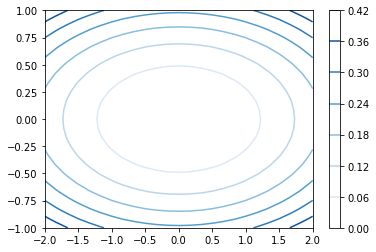

In [2]:
plt.contour(X,Y,Z, cmap='Blues')
plt.colorbar()

plt.show()

#### Images

- Grayscale: rectangular 2D arrays
- Colored: typically three 2D arrays (channels)
	- RGB
- Channels values:
	- 0 to 1

(225, 225, 3)


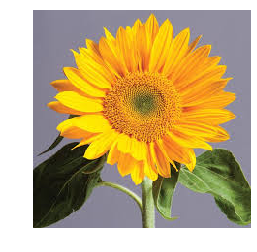

In [3]:
img = plt.imread('./IMAGES/sunflower.jpg')

print(img.shape)

plt.imshow(img)

plt.axis('off')
plt.show()

- Reduction to gray-scale image

(225, 225)


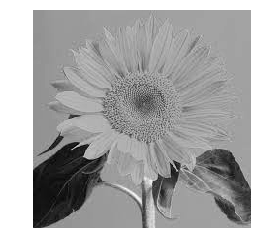

In [4]:
collapsed = img.mean(axis=2)

print(collapsed.shape)

plt.imshow(collapsed, cmap='gray')

plt.axis('off')

plt.show()

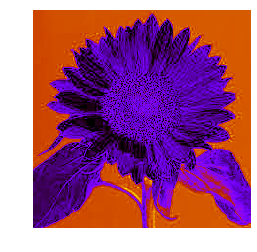

In [5]:
plt.set_cmap('gnuplot')

plt.imshow(img[:,:,2])
plt.axis('off')
plt.show()

#### Seaborn

~~~
sns.residplot(x='age', y='fare', data=df, color='indianred')
plt.show()
~~~

- stripplot()
	- jitter=True
- swarmplot()
	- orient='h'
- violinplot()
- jointplot()
	- kind='kde'
- pairplot()


- Combining plots:

~~~
sns.violinplot(x='day', y='tip', data=tips, inner=None, color='lightgray')

sns.stripplot(x='day', y='tip', data=tips, size=4, jitter=True)

plt.ylabel('tip ($)')
plt.show()
~~~

#### Selecting & formatting data

~~~
jan = temperature['2010-01']

dates = jan.index[::96]
# every fourth day, due to hourly measures

labels = dates.strftime('%b %d') # formatted labels

...

plt.xticks(dates, labels, rotation=60)
~~~

#### Equalization

~~~
orig = plt.imread('low-contrast-moon.jpg')

pixels = orig.flatten()

plt.hist(pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)

plt.show()

minval, maxval = orig.min(), orig.max()

rescaled = (255/(maxval-minval)) * (pixels-minval)

plt.imshow(rescaled)

plt.axis('off')

plt.show()
~~~

~~~
plt.hist(pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)

plt.twinx()

orig_cdf, bins, patches = plt.hist(pixels, cumulative=True, bins=256, range=(0,256), normed=True, color='red', alpha=0.3)

plt.title('Image histogram and CDF')

plt.xlim((0,255))
plt.show()

new_pixels = np.interp(pixels, bins[:-1], orig_cdf*255)
new = new_pixels.reshape(orig.shape)

plt.imshow(new)
plt.axis('off')
plt.title('Equalized image')
plt.show()
~~~